In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
df =pd.read_csv(r"C:\Users\satis_asxzdl9\Downloads\AirPassengers.csv")

In [3]:
df

,Month,Passengers
0,15-01-1949,112
1,15-02-1949,118
2,15-03-1949,132
3,15-04-1949,129
4,15-05-1949,121
...,...,...
139,15-08-1960,606
140,15-09-1960,508
141,15-10-1960,461
142,15-11-1960,390


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
df =df.set_index('Month')
df.head()

,Passengers
Month,
15-01-1949,112
15-02-1949,118
15-03-1949,132
15-04-1949,129
15-05-1949,121


# Visualilze the time series

check for trend , seasonality or random patterns

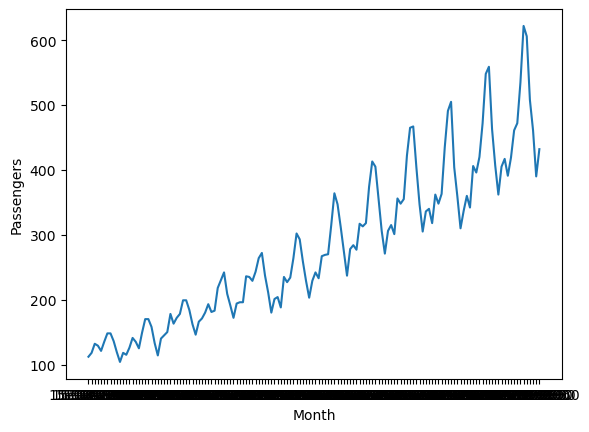

In [6]:
sns.lineplot(x=df.index,y=df['Passengers'])
plt.show()

# Check for stationarity

method-1: Rolling Statistics

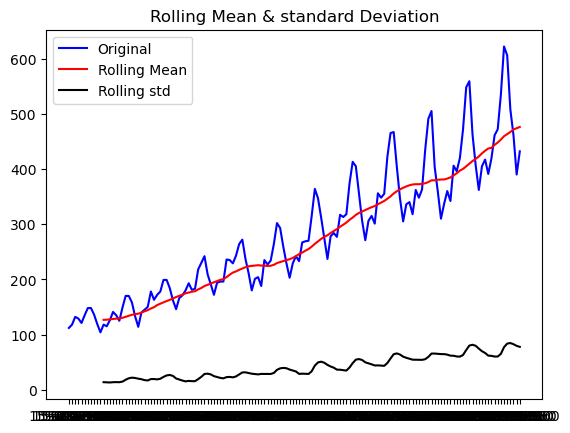

In [7]:
#Determing rolling statistics
rolmean =df['Passengers'].rolling(window=12).mean()
rolstd =df['Passengers'].rolling(window=12).std()

#plot rolling statstics:
orig =plt.plot(df['Passengers'],color='blue',label='Original')
mean =plt.plot(rolmean, color ='red',label='Rolling Mean')
std =plt.plot(rolstd,color ='black',label='Rolling std')
plt.title('Rolling Mean & standard Deviation')
plt.xticks(ticks=df.index)
plt.legend()
plt.show()

# Method 2: Augmented Dicky Fuller Test
    
    . for the Adf test
    .H0: data is non-statinary
    .H1: data is statinary
        
. Based on pvalue,we will accept or reject Ho(if p-value<5% reject null hypothesis)        

In [8]:
from statsmodels.tsa.stattools import adfuller
adfuller_result = adfuller(df['Passengers'])
adfuller_result

(0.8153688792060482,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [9]:
print('p-value',adfuller_result[1])

p-value 0.991880243437641


# The time series is non-statinary


Now ,we have to convert the non-statinary data to statinary data

Differencing

In [10]:
#apply differecing 

diff = df['Passengers']-df['Passengers'].shift(2)

diff.dropna(inplace=True)

#check whether the data is statinary or not after appling differencing
adfuller_result =adfuller(diff)
print('p-value of adf test:',adfuller_result[1])

p-value of adf test: 0.03862975767698839


# Train -Test Split

Split the data into train(80%)&test(20%)

In [11]:
y_train = diff[:114]
y_test =diff[114:]

# Build ARIMA MOdel

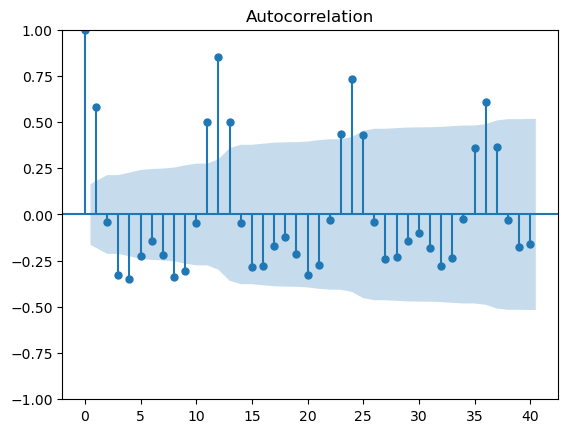

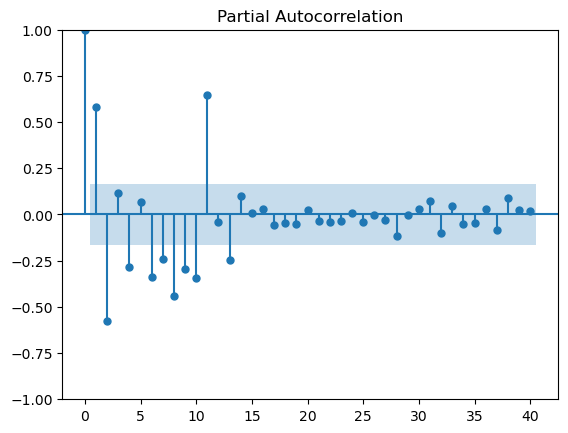

In [12]:
from statsmodels.tsa.stattools import acf,pacf
import statsmodels.api as sm
fig =sm.graphics.tsa.plot_acf(diff,lags=40)
fig =sm.graphics.tsa.plot_pacf(diff,lags=40)

# ARIMA 

ARIMA model is bulid by using p,d,q values

In [13]:
#modelling

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(diff, order=(11,0,12))
ARIMA =model.fit()


#prediction
ypred_test = ARIMA.predict(start=y_test.index[0], end =y_test.index[-1])
ypred_train = ARIMA.predict(start=y_train.index[0],end=y_train.index[-1])


#Evaluation
from sklearn.metrics import r2_score
print("Train R2 of ARIMA Model: ",r2_score(ypred_train,y_train))
print(" Test R2 of  ARIMA Model: ",r2_score(ypred_test,y_test))


C:\Users\satis_asxzdl9\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\satis_asxzdl9\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\satis_asxzdl9\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\satis_asxzdl9\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

Train R2 of ARIMA Model:  0.9381738140204717
 Test R2 of  ARIMA Model:  0.9658022381383763


In [ ]:
# modelling 
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(diff,seasonal_order=(11,0,12,12))
SARIMAX =model.fit()

#predictions
ypred_train = SARIMAX.predict(start=y_train.index[0], end =y_train.index[-1])
ypred_test = SARIMAX.predict(start=y_test.index[0], end =y_test.index[-1])

#Evaluation
from sklearn.metrics import r2_score
print("Train R2 of SARIMAX Model: ",r2_score(ypred_train,y_train))
print("Test R2 of SARIMAX Model:",r2_score(ypred_test,y_test))



C:\Users\satis_asxzdl9\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\satis_asxzdl9\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
